#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
## Reading the image plaksha_Faculty.jpg

img = cv2.imread("Plaksha_Faculty.jpg")

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5 ## Font scale factor
font_color = (0, 0, 255) ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Sneha Mahato\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


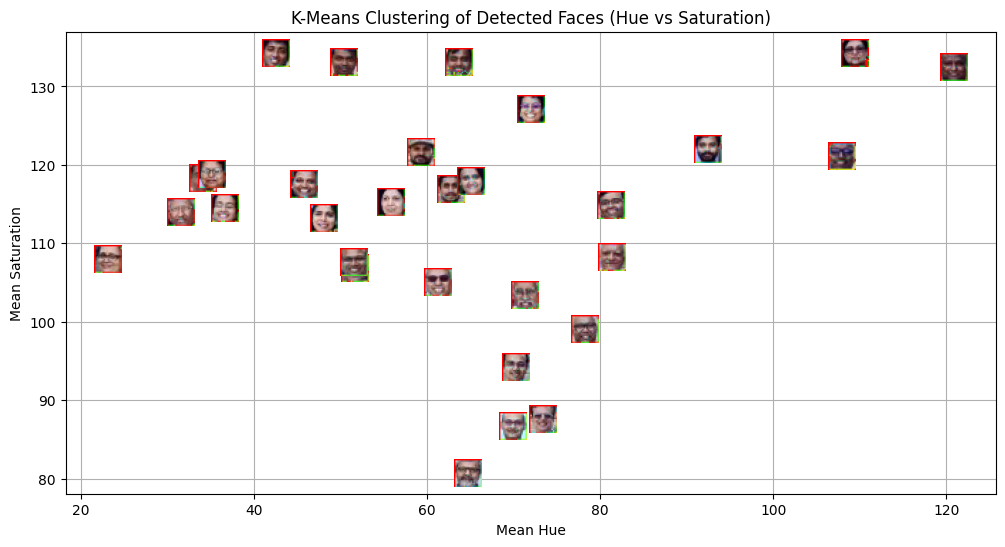

In [3]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)


## Perform k-Means clustering on hue_saturation and store in kmeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
 
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Mean Hue")
## Put y label
plt.ylabel("Mean Saturation")
## Put title
plt.title("K-Means Clustering of Detected Faces (Hue vs Saturation)")
## Put grid
plt.grid(True)
## show the plot
plt.show()

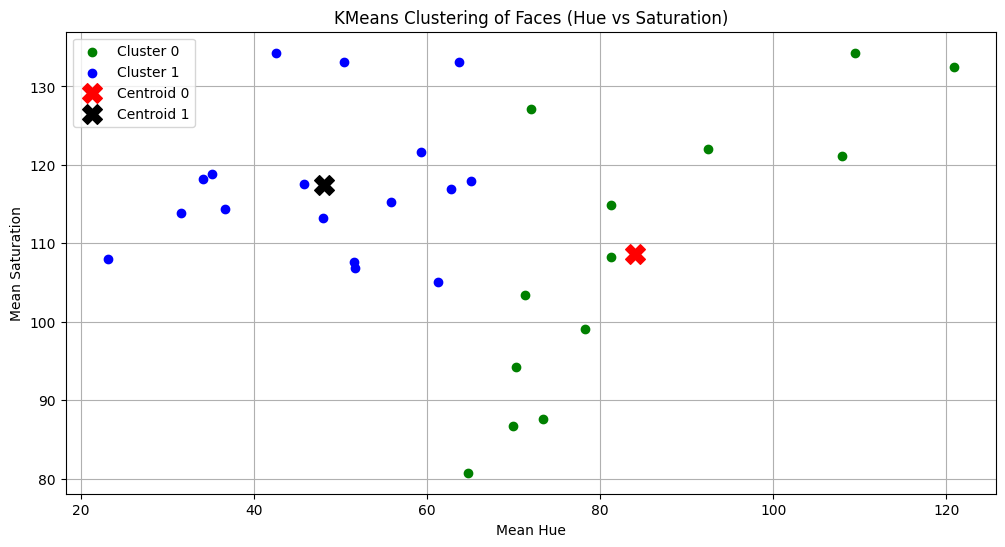

In [4]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0],
            cluster_0_points[:, 1],
            c='green',
            label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0],
            cluster_1_points[:, 1],
            c='blue',
            label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1],
            c='red', marker='X', s=200, label='Centroid 0')

plt.scatter(centroid_1[0], centroid_1[1],
            c='black', marker='X', s=200, label='Centroid 1')

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## Show the plot
plt.xlabel("Mean Hue")
plt.ylabel("Mean Saturation")
plt.title("KMeans Clustering of Faces (Hue vs Saturation)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.3, 5)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Face in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

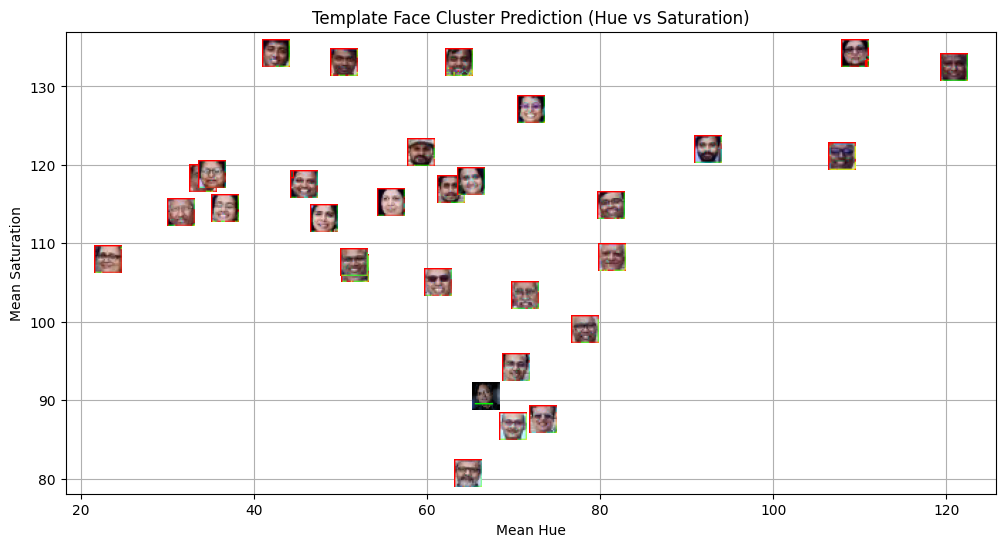

In [6]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)
# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])
# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.scatter(template_hue, template_saturation,
            c=color, marker='X', s=200, label='Template')
## Put x label
## Put y label
## Put title
## Add grid
## show plot

plt.xlabel("Mean Hue")
plt.ylabel("Mean Saturation")
plt.title("Template Face Cluster Prediction (Hue vs Saturation)")
plt.grid(True)
plt.show()

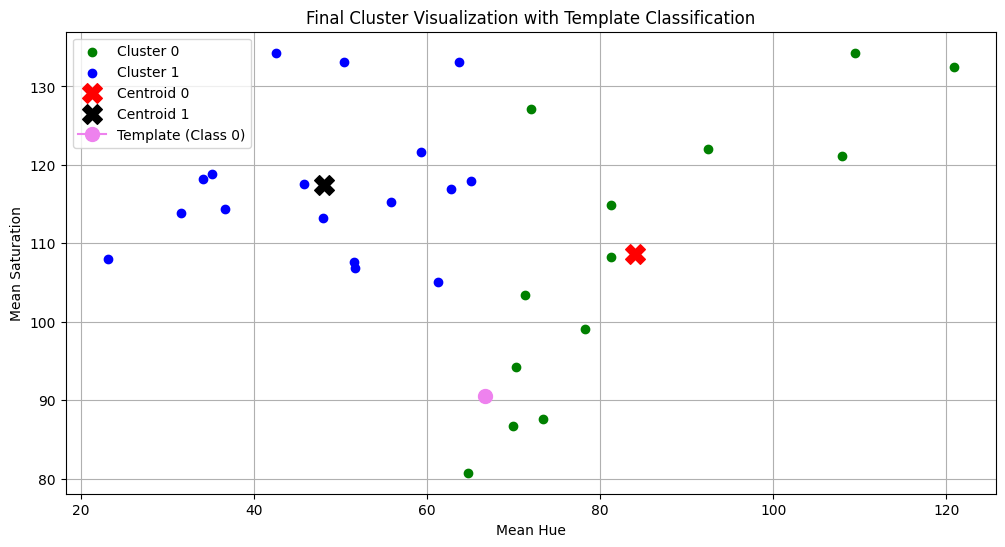

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0],
            cluster_0_points[:, 1],
            c='green',
            label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0],
            cluster_1_points[:, 1],
            c='blue',
            label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1],
            c='red', marker='X', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1],
            c='black', marker='X', s=200, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue,
         template_saturation,
         marker='o',
         c='violet',
         markersize=10,
         label=f'Template (Class {template_label})')

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot
plt.xlabel("Mean Hue")
plt.ylabel("Mean Saturation")
plt.title("Final Cluster Visualization with Template Classification")
plt.legend()
plt.grid(True)
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


<h2>1. What are the common distance metrics used in distance-based classification algorithms?</h2>

Distance-based classification algorithms classify data points based on the similarity or distance between them. The most commonly used distance metrics are:

- Euclidean Distance – Measures the straight-line distance between two points in space. It is widely used for continuous numerical data.
- Manhattan Distance – Measures the sum of absolute differences between coordinates. It is also known as L1 distance or city-block distance.
- Minkowski Distance – A generalized form of distance metric. When p = 1, it becomes Manhattan distance, and when p = 2, it becomes Euclidean distance.
- Hamming Distance – Used for categorical or binary data. It counts the number of differing positions between two strings.
- Cosine Similarity – Measures the cosine of the angle between two vectors. It is commonly used in text classification and high-dimensional data.
- Mahalanobis Distance – Measures distance considering correlations between variables. It is useful when features are correlated.

<h2>2. What are some real-world applications of distance-based classification algorithms?</h2>

Distance-based classification algorithms such as K-Nearest Neighbors (KNN) are widely used in practical applications. Some common applications include:

- Face recognition systems
- Handwriting recognition
- Medical diagnosis (disease prediction based on symptoms)
- Recommendation systems (user similarity)
- Spam detection
- Fraud detection
- Image classification
- Document similarity and text classification

These algorithms are simple yet effective for many pattern recognition tasks

<h2>3. Explain various distance metrics.</h2>

<h4>(a)Euclidean Distance</h4>

It measures the direct distance between two points in Euclidean space.
Formula:

$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

It works well for continuous numerical data but is sensitive to feature scaling.

<h4>(b) Manhattan Distance (L1 Distance) </h4>

Manhattan distance measures the sum of absolute differences between coordinates.
$$
d = \sum_{i=1}^{n} |x_i - y_i|
$$


It is less sensitive to outliers compared to Euclidean distance.

<h4>(c) Minkowski Distance</h4>

Minkowski distance is a generalized distance metric.
$$
d = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

If $p = 1$, it becomes Manhattan distance.

If $p = 2$, it becomes Euclidean distance.

<h4>(d) Hamming Distance </h4>

Hamming distance is used for binary or categorical data. It counts the number of positions where two strings differ.

For two binary vectors:
$$
d = \sum_{i=1}^{n} \mathbf{1}(x_i \ne y_i)
$$

where $\mathbf{1}(x_i \ne y_i)$ equals 1 when values differ and 0 otherwise.

<h4> (e) Cosine similarity</h4>

Cosine similarity measures the cosine of the angle between two vectors.
$$
\cos(\theta) = \frac{A \cdot B}{||A|| \, ||B||}
$$
where:
$$
||A|| = \sqrt{\sum_{i=1}^{n} A_i^2}
$$

Cosine similarity is mainly used in text classification and high-dimensional datasets.

<h4> (f) Mahalanobis Distance</h4>

Mahalanobis distance considers correlation between variables.

$$
d = \sqrt{(x - \mu)^T S^{-1} (x - \mu)}
$$

where:

$\mu$ is the mean vector

$S$ is the covariance matrix

$S^{-1}$ is the inverse covariance matrix

It is useful when features are correlated.

<h2>4. What is the role of cross validation in model performance?</h2>

Cross-validation is used to evaluate how well a model performs on unseen data.

In k-fold cross-validation, the dataset is divided into $k$ subsets.

For each iteration:

- Train on $(k-1)$ subsets

- Test on 1 subset

The overall performance is:

$$
\text{Average Accuracy} = \frac{1}{k} \sum_{i=1}^{k} Accuracy_i
$$

Cross-validation helps:

- Prevent overfitting

- Estimate generalization performance

- Select optimal hyperparameters (such as $K$ in KNN)

<h2> 5. Explain variance and bias in terms of KNN?</h2>

In K-Nearest Neighbors, bias and variance depend on the value of $K$.

<h4> Small Value of $K$ (e.g., $K = 1$)</h4>

- Model becomes very flexible
- Low bias
- High variance
- May lead to overfitting

Mathematically, the prediction is:

$$
\hat{y} = y_{\text{nearest neighbor}}
$$


<h4>Large Value of $K$</h4>

- Model becomes smoother
- High bias
- Low variance
- May lead to underfitting

Prediction is based on majority voting:
$$
\hat{y} = \text{mode}\{y_1, y_2, \dots, y_K\}
$$


<h4>Bias-Variance Tradeoff</h4>

Small $K$ → Low Bias, High Variance

Large $K$ → High Bias, Low Variance

Choosing an optimal $K$ balances:
$$
\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$
